# Assignment - 3 - Cars DataSet

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Reading the csv file into a DataFrame Object and setting the "index" column as its index
df = pd.read_csv(r"C:\Users\khale\Documents\Sprints\Attachment(3)\autos.csv", index_col="index")

# Showing the Shape of the data (rows, columns)
print(f"Data Shape: {df.shape}")

# Showing the first 5 rows.
df.head()

Data Shape: (371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
# Showing the essential Information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

- As we can see our data has some null values
- The dates are being treated as string.

In [4]:
# Showing number of null values in each column.
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
# Fixing the missing Values.
df['notRepairedDamage'].fillna("ja", inplace = True)
df['gearbox'].fillna("manuell", inplace = True)
df.dropna(inplace = True)

- In column 'notRepairedDamage' filled the null values assuming theese Cars with no Damage with 'ja'.
- In column 'fuelType' filled the null values with the most frequent 'manuell' 
- Removing null values from the rest of the columns.

In [6]:
# Fixing the data type of the dates by converting it to datetime using the 'to_datetime' function.
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

# Getting the number of days that the car took to be sold.
# By subtracting the 'lastSeen' date from the 'dateCrawled' date and get its days.
df['days_to_sold'] = (df['lastSeen'] - df['dateCrawled']).dt.days
# Showing the new columns.
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,days_to_sold
index,,,,,,,,,,,,,,,,,,,,,
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,ja,2016-03-14,0,90480,2016-04-05 12:47:46,21
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,3


In [7]:
# Showing the main charctarestics of the numerical Data
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,days_to_sold
count,3.071220e+05,307122.000000,307122.000000,307122.000000,307122.000000,307122.0,307122.000000,307122.000000
mean,9.404320e+03,2002.903706,121.801932,125391.180052,6.067527,0.0,51370.685724,8.314657
std,5.192426e+05,6.597030,171.919845,39347.308065,3.551136,0.0,25761.365779,8.334873
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,-13.000000
25%,1.399000e+03,1999.000000,75.000000,100000.000000,3.000000,0.0,30982.000000,1.000000
50%,3.450000e+03,2003.000000,110.000000,150000.000000,6.000000,0.0,50389.000000,5.000000
75%,7.980000e+03,2007.000000,150.000000,150000.000000,9.000000,0.0,72227.000000,13.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,33.000000


- We suspect that there is some outliers in our Data as the columns 'price', 'powerPS' and 'monthOfRegistration' have min values = 0 and there is a gap between the 75% and the max in the 'price' columns.

In [8]:
# Solving the Outliers issue
df = df[df['monthOfRegistration'] > 0]
# Handling 'price' column outliers.
df = df[df['price'] >= 500]
df = df[df['price'] <= 50000]
# Handling 'powerPS' column outliers.
df = df[df['powerPS'] >= 50]
df = df[df['powerPS'] <= 2000]
# Removing the 0 days from the dataset.
df = df[df['days_to_sold'] > 0]
# removing 'nrOfPictures' column using dropna.
df.drop('nrOfPictures', axis = 1, inplace = True)

- Removing the '0' values in the 'monthOfRegistration' column.
- Removing the cars with the hp less than 50 or higher than 2000 in the 'powerPS' column.
- Removing the outliers in the 'price' column by excluding the prices outside the range between 50 and 2000.
- Removing 'nrOfPictures' column as it's all zeros.

In [9]:
# Showing the main charctarestics of the numerical Data after removing the outliers
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,days_to_sold
count,216021.000000,216021.000000,216021.000000,216021.000000,216021.000000,216021.000000,216021.000000
mean,7002.450141,2003.798117,131.701548,122961.610214,6.378097,52419.980775,10.183177
std,7265.397348,6.249239,66.060649,40131.735590,3.346410,25816.265332,8.174881
min,500.000000,1931.000000,50.000000,5000.000000,1.000000,1067.000000,1.000000
25%,1950.000000,2000.000000,90.000000,100000.000000,3.000000,31785.000000,3.000000
50%,4499.000000,2004.000000,120.000000,150000.000000,6.000000,51588.000000,8.000000
75%,9450.000000,2008.000000,163.000000,150000.000000,9.000000,73441.000000,15.000000
max,50000.000000,2018.000000,2000.000000,150000.000000,12.000000,99998.000000,33.000000


## Data Analysis

- What are the cars that has the highest profit?

In [10]:
# Grouping each car with its Sum of Price Over selling times and sorting them to get the highest.
price_group = df.groupby('name')['price'].sum().sort_values(ascending = False)
price_group.head(10)

name
BMW_116i                                       2586338
BMW_318i                                       2144713
Volkswagen_Golf_2.0_GTI                        2009406
BMW_320i                                       2006589
Audi_A6_Avant_3.0_TDI_DPF_quattro_tiptronic    1923419
Audi_A4_Avant_2.0_TDI_DPF                      1911689
BMW_320d_DPF_Touring                           1673804
MINI_Mini_Cooper                               1597325
Volkswagen_Golf_2.0_GTI_DSG                    1560230
Volkswagen_Golf                                1503055
Name: price, dtype: int64

- Which type of fuel has the biggest average price?

In [11]:
# Grouping each fuel type with its price average
fuel_price = df.groupby("fuelType")['price'].mean().sort_values(ascending = False)
fuel_price

fuelType
hybrid     13635.422222
elektro    11199.607143
diesel      9666.097495
benzin      5634.701489
cng         5359.927461
lpg         4739.362340
andere      4722.600000
Name: price, dtype: float64

In [12]:
# Getting the percentage of each gearbox type.
gear = (df['gearbox'].value_counts() / len(df))
gear

manuell      0.760695
automatik    0.239305
Name: gearbox, dtype: float64

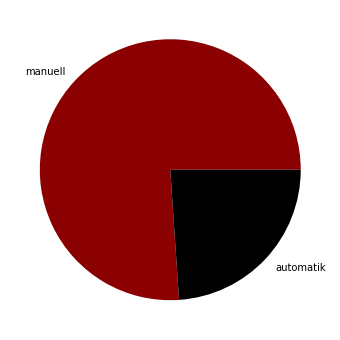

In [13]:
plt.figure(figsize = (12, 6))
plt.pie(gear, labels = gear.index, colors = ['darkred', 'black']);

- which brand has the highest Demand among transactions?

In [14]:
# Grouping each brand with its count to get which brands have the highst number of transacions.
# also sorting the counts of the brands.
most_demanded_brands = df['brand'].value_counts(ascending = False)
most_demanded_brands.head()

volkswagen       44972
bmw              26431
mercedes_benz    23027
audi             21446
opel             20298
Name: brand, dtype: int64

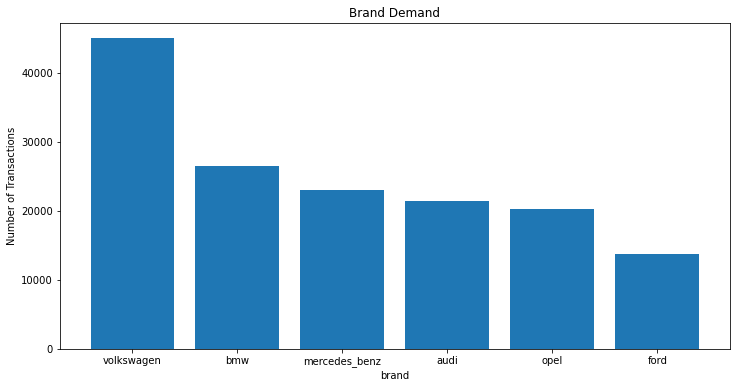

In [17]:
# Making Bar Chart to clarify the brand's counts
plt.figure(figsize = (12, 6))
plt.bar(x = most_demanded_brands.head(6).index, height = most_demanded_brands.head(6))
plt.xlabel("brand")
plt.ylabel("Number of Transactions")
plt.title("Brand Demand");

- We Can see that 'volkswagen' has the highst number of sellings comes after it 'BMW' and 'Mercedes Benz'.

- What is the average number of days the car takes to be sold?

In [18]:
# Getting the mean number of days the car takes to be sold and converting it to an integer.
avg_days_ro_sold = int(df['days_to_sold'].mean())
print(f"the average number of days the car takes to be sold is nearly {avg_days_ro_sold} days.")

the average number of days the car takes to be sold is nearly 10 days.


- But, Is the car that takes more time to be sold Cheaper or more expensive?
- As our column 'days_to_sold' ranges from 1 to 33 days will split it into 4 ranges and calculate the average price for each one of them to test whether they have a relation or no.

In [19]:
# A dictionary that holds the average price for each of the 4 ranges 
days_sold_cats = {
    "less than 10 days": round(df.loc[df['days_to_sold'] <= 10, 'price'].mean(), 3),
    "between 10 to 20 days": round(df.loc[df['days_to_sold'].between(10, 20), 'price'].mean(), 3),
    "between 20 to 30 days": round(df.loc[df['days_to_sold'].between(20, 30), 'price'].mean(), 3),
    "more than 30 days": round(df.loc[df['days_to_sold'] > 30, 'price'].mean(), 3),
}

days_sold_cats

{'less than 10 days': 6475.112,
 'between 10 to 20 days': 7577.803,
 'between 20 to 30 days': 8157.401,
 'more than 30 days': 8084.319}

- We can observe that the cars that took more days to be sold have bigger average price.
- we can intrpret this as the number of buyers for cars with higher price can be little.

- What is the car with the highst horse power in each brand?

In [21]:
# Grouping each brand with the index of the highst horse power in it to use it.
brand_power_idx = df.groupby('brand')['powerPS'].idxmax()

# Filtering the data to get the rows in these indecies and the columns ['brand', 'name', 'powerPS'].
brand_power = df.loc[brand_power_idx, ['brand', 'name', 'powerPS']].sort_values('powerPS', ascending = False)
# Displaying the first 5 rows of the data frame
brand_power.head()

,brand,name,powerPS
index,,,
180884,citroen,Citroen_Jumper,2000
316278,volkswagen,VW_GOLF_V_GTI,2000
192420,renault,Zu_Verkaufen,1998
23362,bmw,BMW_328i_schalter,1993
98990,fiat,Hagelschaden__sonst_top,1920


In [22]:
# Getting the percentage of each abtest type.
test_pc = (df['abtest'].value_counts() / len(df)).to_frame()
test_pc

,abtest
test,0.517815
control,0.482185


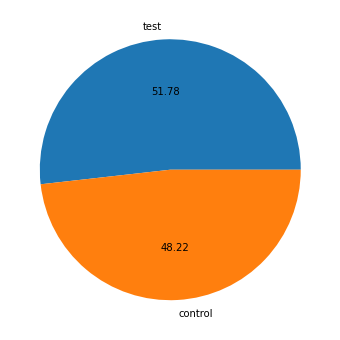

In [23]:
# Showing the difference visually using plt.pie chart.
plt.figure(figsize = (12, 6))
plt.pie(test_pc.abtest, labels = test_pc.index, autopct = "%.2f");

- The most number of transactions are in march and july.

- what is the prefrences of the customers is it the new age cars or the old age cars?

In [24]:
year_avg_price = {}
for i in range(df['yearOfRegistration'].min(), df['yearOfRegistration'].max() + 1, 10):
    year_avg_price[f"{i - 1} - {i + 9}"] = len(df[df['yearOfRegistration'].between(i - 1, i + 9)])

year_avg_price = pd.DataFrame({
    "Decade": year_avg_price.keys(),
    "Transaction_Count": year_avg_price.values()
})
year_avg_price.sort_values("Transaction_Count", ascending = False)

,Decade,Transaction_Count
7,2000 - 2010,138106
6,1990 - 2000,56239
8,2010 - 2020,39033
5,1980 - 1990,3858
4,1970 - 1980,1003
3,1960 - 1970,361
2,1950 - 1960,49
1,1940 - 1950,14
0,1930 - 1940,3


- We can see that they pretend to love the new school cars as the highest number of transactions are in 2000s.

## ML- Model

## Regression Model: Price Prediction

### Making  a data copy for feature processing 'dff'

In [25]:
# making a copy of the DataFrame to transform the features into the right form
dff = df.copy()
# Showing the first five rows from the feature matrix
dff.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,days_to_sold
index,,,,,,,,,,,,,,,,,,,,
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,ja,2016-03-14,90480,2016-04-05 12:47:46,21
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06 10:17:21,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,2016-04-06 19:17:07,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,2016-04-05 18:18:39,3
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26,96224,2016-04-06 10:45:34,10


### Feature Processing 

In [26]:
dff.drop(["dateCrawled", "dateCreated", "lastSeen"], axis = 1, inplace = True)

for col in dff.columns:
    # Checking wheter a column is string or not to encode it.
    if dff[col].dtype == 'O':
        # replacing each categorical feature with its encoded version.
        dff[col] = pd.factorize(dff[col])[0]
dff.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,days_to_sold
index,,,,,,,,,,,,,,,,,
2,0,0,0,9800,0,0,2004,0,163,0,125000,8,0,0,0,90480,21
4,1,0,0,3600,0,1,2008,1,69,1,90000,7,0,1,1,60437,5
5,2,0,0,650,0,2,1995,1,102,2,150000,10,1,2,0,33775,2
6,3,0,0,2200,0,3,2004,1,109,3,150000,8,1,3,1,67112,3
10,4,0,0,2000,1,2,2004,1,105,4,150000,12,1,4,1,96224,10


- Using the function factorize() from pandas library (Previously learned and used in a COLLEGE PROJECT):
- - it encodes the categorical values of the column into corresponding numeric values.
- - returning a tuple that has two arrays one for the numerical values of the categorical values and one for the unique values of the categories.
- - indexing this tuple by [0] to get the corresponding numerical values of the categories and replacing the original column by it.

### Feature matrix and target vector.

In [27]:
# Choosing the most relavent features to the 'price' column to predict based on it  
Xr = dff[['yearOfRegistration', 'powerPS', 'kilometer', 'vehicleType', 'model','fuelType', 'notRepairedDamage']]

# making the target vector y by choosing the 'price' column from the data.
yr = dff['price']

### Train-Test Splitting (75%, 25%)

- by slicing the data from the 0 index to the 75% of the data size as training set.
- and from the 75% of the data size to the end as test data.

In [28]:
# Dividing the data into 75% training and 25% testing for the model.
Xr_train = Xr.iloc[ :int(len(Xr) * 0.75), :]
Xr_test = Xr.iloc[int(len(Xr) * 0.75): , :]
yr_train = yr.iloc[ :int(len(yr) * 0.75)]
yr_test = yr.iloc[int(len(yr) * 0.75): ]

# Printing the shape of the training and test sets to ensure our split.
print("X train shape: ", Xr_train.shape)
print("X test shape: ", Xr_test.shape)
print("y train shape: ", yr_train.shape)
print("y test shape: ", yr_test.shape)

X train shape:  (162015, 7)
X test shape:  (54006, 7)
y train shape:  (162015,)
y test shape:  (54006,)


### Choosing the Regression Model
- Firstly tried the LinearRegression model on the same features and split but resulted low accuracy.
- so, i Figured out that the relations between the features and the target column (price) could need more complex model to detect this relations.
- Using the 'RandomForestRegressor' as it's an ensemble model that can detect this complex relations it resulted better accuracy than the linear regression model by far.

In [29]:
# Initializing the random forest Model.
model_rf = RandomForestRegressor()

# Training the model on the training data using the fit() method.
model_rf.fit(Xr_train, yr_train)

RandomForestRegressor()

### Evaluating the regression model 
- getting the accuracy of the model on the training and test data.
- using the score() function to calculate the accuracy.

In [30]:
# printing the training accuracy.
print("Training Accuracy:", round(model_rf.score(Xr_train, yr_train), 5) * 100, "%")
# printing the test accuracy.
print("Test Accuarcy:", round(model_rf.score(Xr_test, yr_test), 5) * 100, "%")

# Generating the model prediction on the test data.
y_pred = model_rf.predict(Xr_test)

# printing the mean squared error and mean absolute error of the model.
print("MSE:", round(mean_squared_error(yr_test, y_pred), 3))
print("MAE:", round(mean_absolute_error(yr_test, y_pred), 3))

Training Accuracy: 97.048 %
Test Accuarcy: 90.958 %
MSE: 4640431.497
MAE: 1218.085
